In [389]:
#Importe de las librerias 
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree, datasets, metrics

import pydotplus
from IPython.display import Image  
from sklearn.externals.six import StringIO  


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


ModuleNotFoundError: No module named 'pydotplus'

# Carga y limpieza de datos #

### 1. Carga de datos y visualización de los mismos

In [319]:
df = pd.read_csv(r"train.csv",sep=',') #creación del dataframe apartir de un archivo .csv
df.head(10) #Muestra los primeros 10 datos

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [320]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [321]:
#Dado que debo hacer clasificación según el problema, se requiere cambiar el tipo de dato de la columna
#'Cover_Type' debido a que como es mi variable dependiente debe ser de tipo categórica.
df.Cover_Type = df.Cover_Type.astype(object)

In [322]:
df.Soil_Type1=df.Soil_Type1.astype(object)
df.Soil_Type2=df.Soil_Type1.astype(object)
df.Soil_Type3=df.Soil_Type1.astype(object)
df.Soil_Type4=df.Soil_Type1.astype(object)
df.Soil_Type5=df.Soil_Type1.astype(object)
df.Soil_Type6=df.Soil_Type1.astype(object)
df.Soil_Type7=df.Soil_Type1.astype(object)
df.Soil_Type8=df.Soil_Type1.astype(object)
df.Soil_Type9=df.Soil_Type1.astype(object)
df.Soil_Type10=df.Soil_Type1.astype(object)
df.Soil_Type11=df.Soil_Type1.astype(object)
df.Soil_Type12=df.Soil_Type1.astype(object)
df.Soil_Type13=df.Soil_Type1.astype(object)
df.Soil_Type14=df.Soil_Type1.astype(object)
df.Soil_Type15=df.Soil_Type1.astype(object)
df.Soil_Type16=df.Soil_Type1.astype(object)
df.Soil_Type17=df.Soil_Type1.astype(object)
df.Soil_Type18=df.Soil_Type1.astype(object)
df.Soil_Type19=df.Soil_Type1.astype(object)
df.Soil_Type20=df.Soil_Type1.astype(object)
df.Soil_Type21=df.Soil_Type1.astype(object)
df.Soil_Type22=df.Soil_Type1.astype(object)
df.Soil_Type23=df.Soil_Type1.astype(object)
df.Soil_Type24=df.Soil_Type1.astype(object)
df.Soil_Type25=df.Soil_Type1.astype(object)
df.Soil_Type26=df.Soil_Type1.astype(object)
df.Soil_Type27=df.Soil_Type1.astype(object)
df.Soil_Type28=df.Soil_Type1.astype(object)
df.Soil_Type29=df.Soil_Type1.astype(object)
df.Soil_Type30=df.Soil_Type1.astype(object)
df.Soil_Type31=df.Soil_Type1.astype(object)
df.Soil_Type32=df.Soil_Type1.astype(object)
df.Soil_Type33=df.Soil_Type1.astype(object)
df.Soil_Type34=df.Soil_Type1.astype(object)
df.Soil_Type35=df.Soil_Type1.astype(object)
df.Soil_Type36=df.Soil_Type1.astype(object)
df.Soil_Type37=df.Soil_Type1.astype(object)
df.Soil_Type38=df.Soil_Type1.astype(object)
df.Soil_Type39=df.Soil_Type1.astype(object)
df.Soil_Type40=df.Soil_Type1.astype(object)

df.Wilderness_Area1=df.Wilderness_Area1.astype(object)
df.Wilderness_Area2=df.Wilderness_Area2.astype(object)
df.Wilderness_Area3=df.Wilderness_Area3.astype(object)
df.Wilderness_Area4=df.Wilderness_Area4.astype(object)

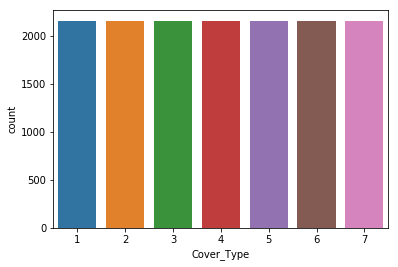

In [323]:
ax = sns.countplot(x="Cover_Type", data=df)

## Análisis univariado

# Para Soil_type1

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type1, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type1, dtype: int64
 -------- 


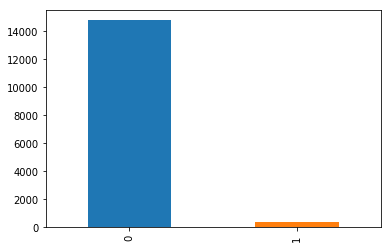

In [324]:
print(df.Soil_Type1.describe())
print(" -------- ")
print(df.Soil_Type1.value_counts())
print(" -------- ")
df.Soil_Type1.value_counts().plot.bar()

## Para Soil_Type2

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type2, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type2, dtype: int64
 -------- 


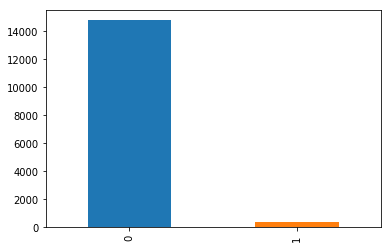

In [325]:
print(df.Soil_Type2.describe())
print(" -------- ")
print(df.Soil_Type2.value_counts())
print(" -------- ")
df.Soil_Type2.value_counts().plot.bar()

## Para Soil_type3

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type3, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type3, dtype: int64
 -------- 


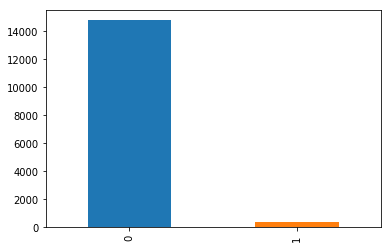

In [326]:
print(df.Soil_Type3.describe())
print(" -------- ")
print(df.Soil_Type3.value_counts())
print(" -------- ")
df.Soil_Type3.value_counts().plot.bar()

## Para Soil_type4

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type4, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type4, dtype: int64
 -------- 


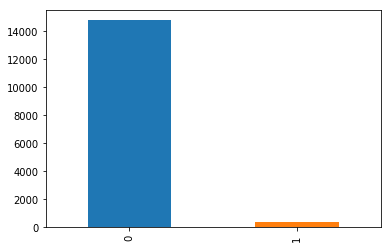

In [327]:
# Para Soil_type1
print(df.Soil_Type4.describe())
print(" -------- ")
print(df.Soil_Type4.value_counts())
print(" -------- ")
df.Soil_Type4.value_counts().plot.bar()

## Para Soil_type5

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type5, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type5, dtype: int64
 -------- 


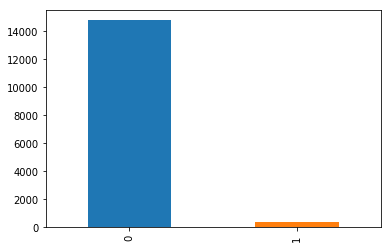

In [328]:

print(df.Soil_Type5.describe())
print(" -------- ")
print(df.Soil_Type5.value_counts())
print(" -------- ")
df.Soil_Type5.value_counts().plot.bar()

## Para Soil_type6

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type6, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type6, dtype: int64
 -------- 


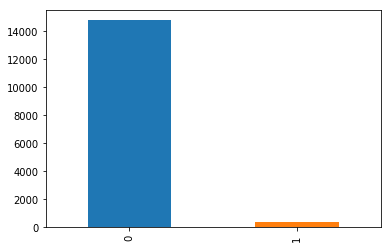

In [329]:
# Para Soil_type1
print(df.Soil_Type6.describe())
print(" -------- ")
print(df.Soil_Type6.value_counts())
print(" -------- ")
df.Soil_Type6.value_counts().plot.bar()

## Para Soil_type7

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type7, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type7, dtype: int64
 -------- 


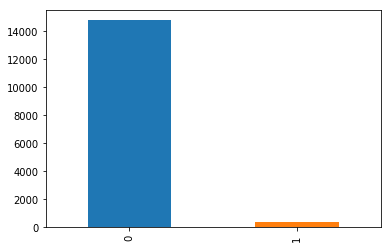

In [330]:

print(df.Soil_Type7.describe())
print(" -------- ")
print(df.Soil_Type7.value_counts())
print(" -------- ")
df.Soil_Type7.value_counts().plot.bar()

## Para Soil_type8

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type8, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type8, dtype: int64
 -------- 


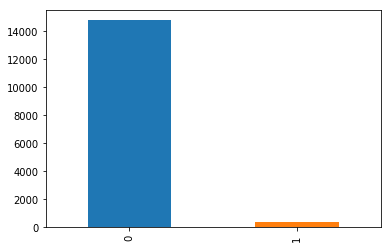

In [331]:

print(df.Soil_Type8.describe())
print(" -------- ")
print(df.Soil_Type8.value_counts())
print(" -------- ")
df.Soil_Type8.value_counts().plot.bar()

## Para Soil_type9

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type9, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type9, dtype: int64
 -------- 


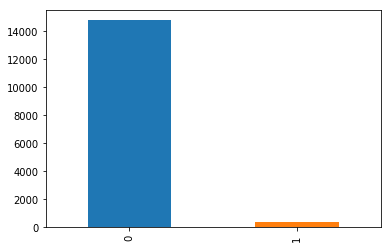

In [332]:

print(df.Soil_Type9.describe())
print(" -------- ")
print(df.Soil_Type9.value_counts())
print(" -------- ")
df.Soil_Type9.value_counts().plot.bar()

## Para Soil_type10

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type10, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type10, dtype: int64
 -------- 


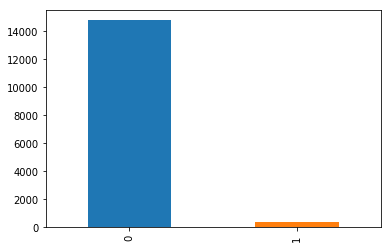

In [333]:

print(df.Soil_Type10.describe())
print(" -------- ")
print(df.Soil_Type10.value_counts())
print(" -------- ")
df.Soil_Type10.value_counts().plot.bar()

## Para Soil_type11

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type11, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type11, dtype: int64
 -------- 


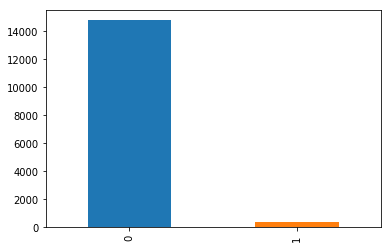

In [334]:

print(df.Soil_Type11.describe())
print(" -------- ")
print(df.Soil_Type11.value_counts())
print(" -------- ")
df.Soil_Type11.value_counts().plot.bar()

## Para Soil_type12

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type12, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type12, dtype: int64
 -------- 


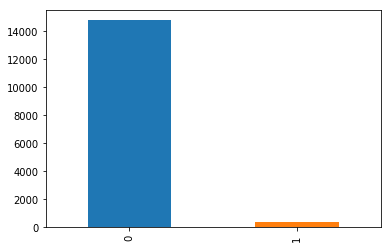

In [335]:

print(df.Soil_Type12.describe())
print(" -------- ")
print(df.Soil_Type12.value_counts())
print(" -------- ")
df.Soil_Type12.value_counts().plot.bar()

## Para Soil_type13

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type13, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type13, dtype: int64
 -------- 


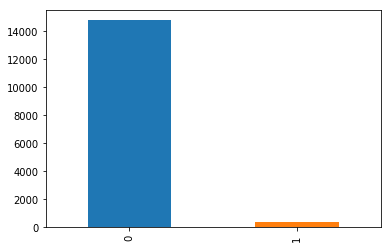

In [336]:

print(df.Soil_Type13.describe())
print(" -------- ")
print(df.Soil_Type13.value_counts())
print(" -------- ")
df.Soil_Type13.value_counts().plot.bar()

## Para Soil_type14

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type14, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type14, dtype: int64
 -------- 


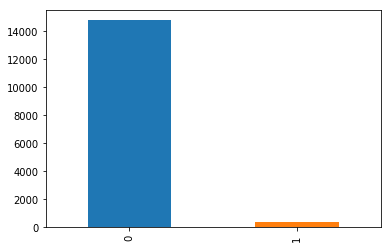

In [337]:

print(df.Soil_Type14.describe())
print(" -------- ")
print(df.Soil_Type14.value_counts())
print(" -------- ")
df.Soil_Type14.value_counts().plot.bar()

## Para Soil_type15

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type15, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type15, dtype: int64
 -------- 


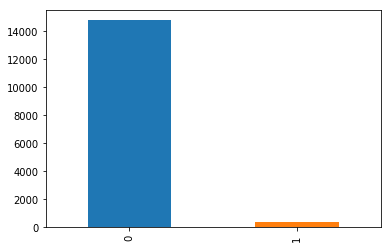

In [338]:

print(df.Soil_Type15.describe())
print(" -------- ")
print(df.Soil_Type15.value_counts())
print(" -------- ")
df.Soil_Type15.value_counts().plot.bar()

## Para Soil_type16

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type16, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type16, dtype: int64
 -------- 


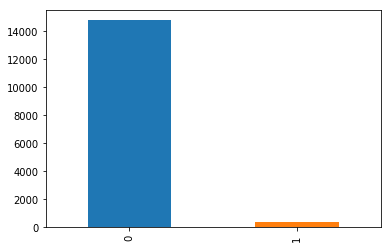

In [339]:

print(df.Soil_Type16.describe())
print(" -------- ")
print(df.Soil_Type16.value_counts())
print(" -------- ")
df.Soil_Type16.value_counts().plot.bar()

## Para Soil_type17

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type17, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type17, dtype: int64
 -------- 


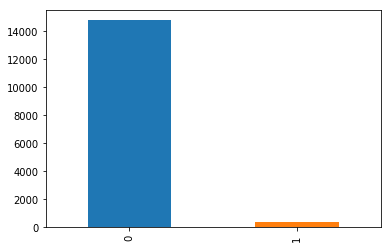

In [340]:

print(df.Soil_Type17.describe())
print(" -------- ")
print(df.Soil_Type17.value_counts())
print(" -------- ")
df.Soil_Type17.value_counts().plot.bar()

## Para Soil_type18

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type18, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type18, dtype: int64
 -------- 


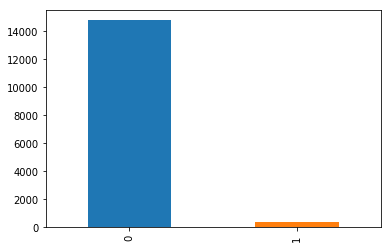

In [341]:

print(df.Soil_Type18.describe())
print(" -------- ")
print(df.Soil_Type18.value_counts())
print(" -------- ")
df.Soil_Type18.value_counts().plot.bar()

## Para Soil_type19

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type19, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type19, dtype: int64
 -------- 


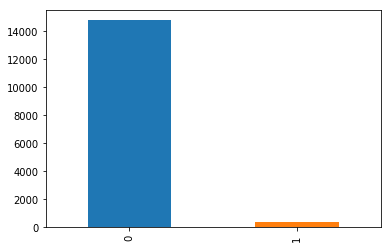

In [342]:

print(df.Soil_Type19.describe())
print(" -------- ")
print(df.Soil_Type19.value_counts())
print(" -------- ")
df.Soil_Type19.value_counts().plot.bar()

## Para Soil_type20

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type20, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type20, dtype: int64
 -------- 


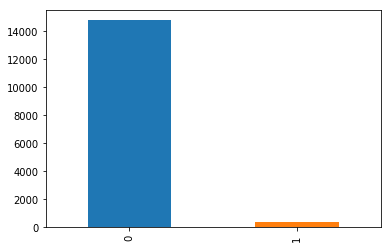

In [343]:

print(df.Soil_Type20.describe())
print(" -------- ")
print(df.Soil_Type20.value_counts())
print(" -------- ")
df.Soil_Type20.value_counts().plot.bar()

## Para Soil_type21

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type21, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type21, dtype: int64
 -------- 


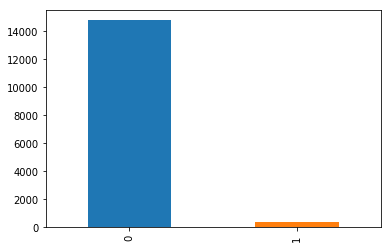

In [344]:

print(df.Soil_Type21.describe())
print(" -------- ")
print(df.Soil_Type21.value_counts())
print(" -------- ")
df.Soil_Type21.value_counts().plot.bar()

## Para Soil_type22

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type22, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type22, dtype: int64
 -------- 


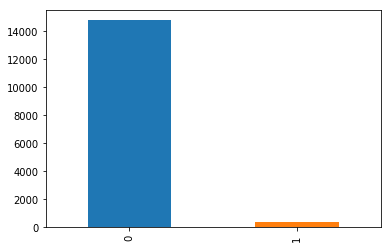

In [345]:

print(df.Soil_Type22.describe())
print(" -------- ")
print(df.Soil_Type22.value_counts())
print(" -------- ")
df.Soil_Type22.value_counts().plot.bar()

## Para Soil_type23

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type23, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type23, dtype: int64
 -------- 


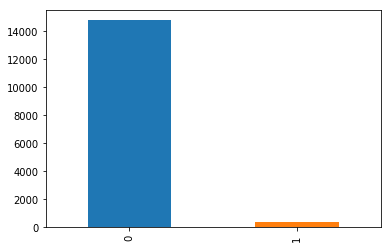

In [346]:

print(df.Soil_Type23.describe())
print(" -------- ")
print(df.Soil_Type23.value_counts())
print(" -------- ")
df.Soil_Type23.value_counts().plot.bar()

## Para Soil_type24

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type24, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type24, dtype: int64
 -------- 


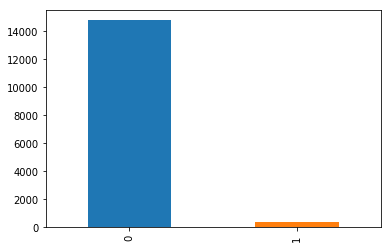

In [347]:

print(df.Soil_Type24.describe())
print(" -------- ")
print(df.Soil_Type24.value_counts())
print(" -------- ")
df.Soil_Type24.value_counts().plot.bar()

## Para Soil_type25

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type25, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type25, dtype: int64
 -------- 


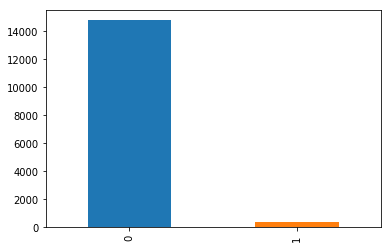

In [348]:

print(df.Soil_Type25.describe())
print(" -------- ")
print(df.Soil_Type25.value_counts())
print(" -------- ")
df.Soil_Type25.value_counts().plot.bar()

## Para Soil_type26

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type26, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type26, dtype: int64
 -------- 


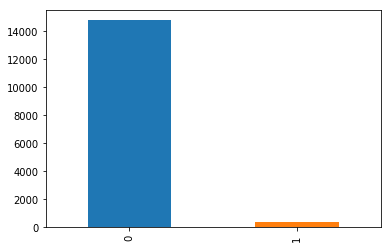

In [349]:

print(df.Soil_Type26.describe())
print(" -------- ")
print(df.Soil_Type26.value_counts())
print(" -------- ")
df.Soil_Type26.value_counts().plot.bar()

## Para Soil_type27

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type27, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type27, dtype: int64
 -------- 


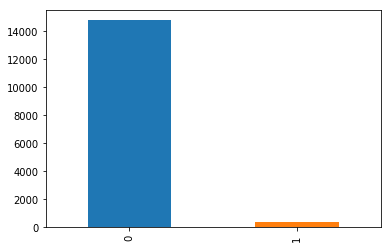

In [350]:

print(df.Soil_Type27.describe())
print(" -------- ")
print(df.Soil_Type27.value_counts())
print(" -------- ")
df.Soil_Type27.value_counts().plot.bar()

## Para Soil_type28

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type28, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type28, dtype: int64
 -------- 


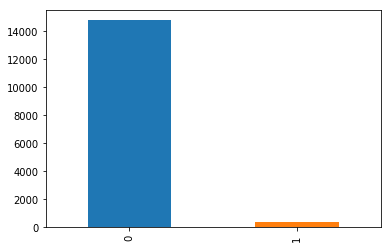

In [351]:

print(df.Soil_Type28.describe())
print(" -------- ")
print(df.Soil_Type28.value_counts())
print(" -------- ")
df.Soil_Type28.value_counts().plot.bar()

## Para Soil_type29

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type29, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type29, dtype: int64
 -------- 


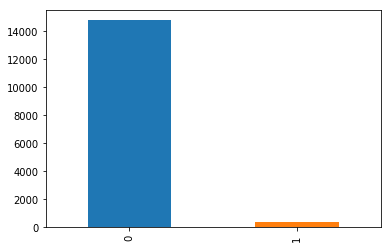

In [352]:

print(df.Soil_Type29.describe())
print(" -------- ")
print(df.Soil_Type29.value_counts())
print(" -------- ")
df.Soil_Type29.value_counts().plot.bar()

## Para Soil_type30

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type30, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type30, dtype: int64
 -------- 


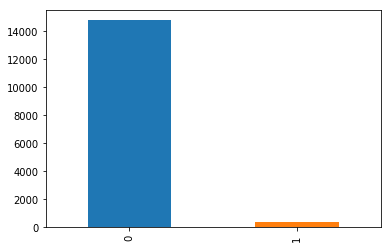

In [353]:

print(df.Soil_Type30.describe())
print(" -------- ")
print(df.Soil_Type30.value_counts())
print(" -------- ")
df.Soil_Type30.value_counts().plot.bar()

## Para Soil_type31

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type31, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type31, dtype: int64
 -------- 


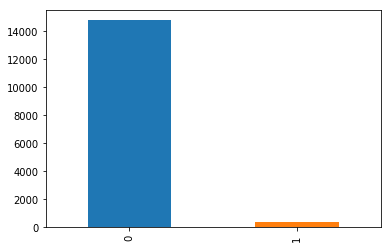

In [354]:

print(df.Soil_Type31.describe())
print(" -------- ")
print(df.Soil_Type31.value_counts())
print(" -------- ")
df.Soil_Type31.value_counts().plot.bar()

## Para Soil_type32

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type32, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type32, dtype: int64
 -------- 


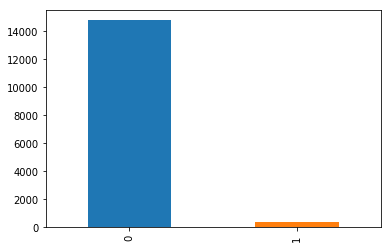

In [355]:

print(df.Soil_Type32.describe())
print(" -------- ")
print(df.Soil_Type32.value_counts())
print(" -------- ")
df.Soil_Type32.value_counts().plot.bar()

## Para Soil_type33

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type33, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type33, dtype: int64
 -------- 


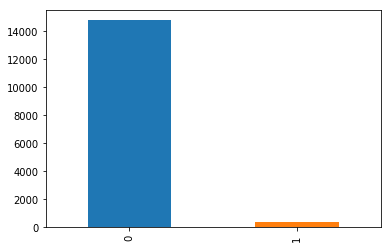

In [356]:

print(df.Soil_Type33.describe())
print(" -------- ")
print(df.Soil_Type33.value_counts())
print(" -------- ")
df.Soil_Type33.value_counts().plot.bar()

## Para Soil_type34

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type34, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type34, dtype: int64
 -------- 


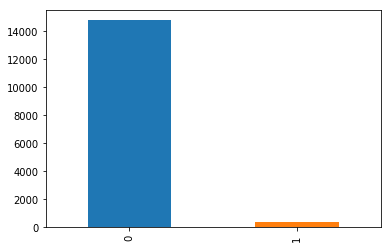

In [357]:

print(df.Soil_Type34.describe())
print(" -------- ")
print(df.Soil_Type34.value_counts())
print(" -------- ")
df.Soil_Type34.value_counts().plot.bar()

## Para Soil_type35

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type35, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type35, dtype: int64
 -------- 


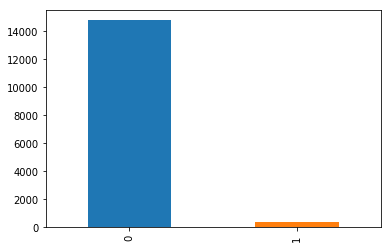

In [358]:

print(df.Soil_Type35.describe())
print(" -------- ")
print(df.Soil_Type35.value_counts())
print(" -------- ")
df.Soil_Type35.value_counts().plot.bar()

## Para Soil_type36

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type36, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type36, dtype: int64
 -------- 


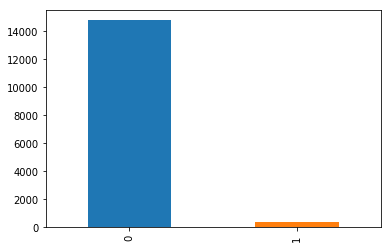

In [359]:

print(df.Soil_Type36.describe())
print(" -------- ")
print(df.Soil_Type36.value_counts())
print(" -------- ")
df.Soil_Type36.value_counts().plot.bar()

## Para Soil_type37

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type37, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type37, dtype: int64
 -------- 


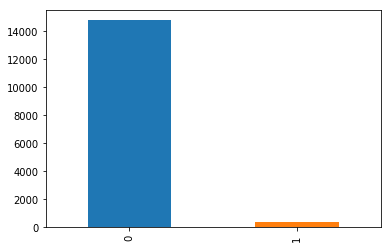

In [360]:

print(df.Soil_Type37.describe())
print(" -------- ")
print(df.Soil_Type37.value_counts())
print(" -------- ")
df.Soil_Type37.value_counts().plot.bar()

## Para Soil_type38

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type38, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type38, dtype: int64
 -------- 


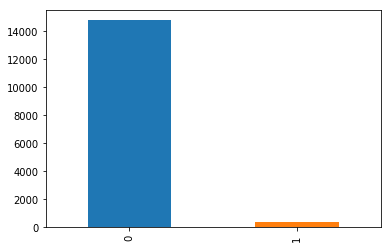

In [361]:

print(df.Soil_Type38.describe())
print(" -------- ")
print(df.Soil_Type38.value_counts())
print(" -------- ")
df.Soil_Type38.value_counts().plot.bar()

## Para Soil_type39

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type39, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type39, dtype: int64
 -------- 


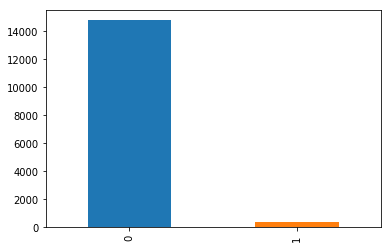

In [362]:

print(df.Soil_Type39.describe())
print(" -------- ")
print(df.Soil_Type39.value_counts())
print(" -------- ")
df.Soil_Type39.value_counts().plot.bar()

## Para Soil_type40

count     15120
unique        2
top           0
freq      14765
Name: Soil_Type40, dtype: int64
 -------- 
0    14765
1      355
Name: Soil_Type40, dtype: int64
 -------- 


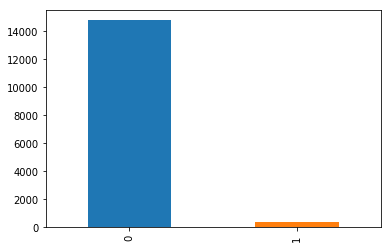

In [363]:

print(df.Soil_Type40.describe())
print(" -------- ")
print(df.Soil_Type40.value_counts())
print(" -------- ")
df.Soil_Type40.value_counts().plot.bar()

## Para Elevation

count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64
 -------- 
2290    25
2830    25
3371    24
3244    23
2820    23
2955    23
2795    23
2952    23
2962    22
2304    22
2809    22
2978    22
2413    22
2707    22
2850    22
2763    22
2289    21
2739    21
2827    21
2784    21
2807    21
2328    21
2311    20
3256    20
2751    20
2336    20
2340    20
2317    20
2264    20
3400    20
        ..
3529     1
3537     1
3722     1
3495     1
3491     1
3721     1
1932     1
3559     1
3753     1
3761     1
3591     1
3475     1
3499     1
3836     1
1997     1
3844     1
1901     1
1925     1
1965     1
1973     1
1989     1
3731     1
3523     1
3675     1
3643     1
3635     1
3603     1
3555     1
3497     1
3737     1
Name: Elevation, Length: 1665, dtype: int64
 -------- 


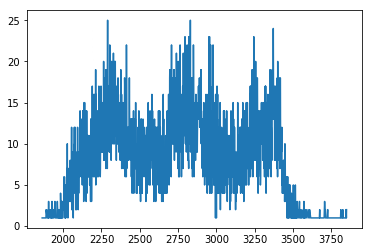

In [364]:
print(df.Elevation.describe())
print(" -------- ")
print(df.Elevation.value_counts())
ordenado=df.Elevation.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## para Aspect

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64
 -------- 
45     117
0      110
90     109
63      89
76      87
27      82
315     81
75      80
108     79
117     78
34      77
72      77
121     77
135     75
80      75
57      75
53      74
62      73
124     71
86      71
61      71
111     70
18      70
84      70
52      69
101     68
93      68
39      68
49      68
87      67
      ... 
230     17
222     17
154     17
268     17
236     17
239     16
262     15
256     15
199     15
244     15
217     15
220     15
258     15
250     15
221     14
227     14
237     14
241     14
245     13
235     13
242     13
246     13
278     13
218     12
224     11
263     10
248     10
249      9
226      7
360      2
Name: Aspect, Length: 361, dtype: int64
 -------- 


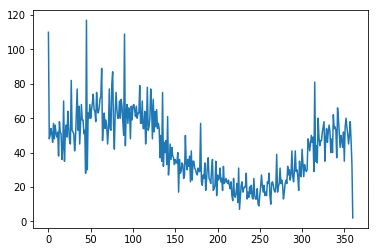

In [365]:
print(df.Aspect.describe())
print(" -------- ")
print(df.Aspect.value_counts())
ordenado=df.Aspect.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Para Slope

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64
 -------- 
11    740
10    739
13    717
14    699
12    677
9     664
15    664
16    640
17    598
8     574
7     573
18    558
20    552
19    519
21    465
6     465
22    458
23    450
5     423
24    394
25    359
26    329
28    313
4     305
27    297
29    258
31    218
30    216
3     210
32    187
33    143
2     134
34    131
35    101
1      78
36     68
37     58
38     36
39     32
41     18
40     16
46     15
0       5
49      5
44      5
42      3
45      3
47      3
43      2
48      1
50      1
52      1
Name: Slope, dtype: int64
 -------- 


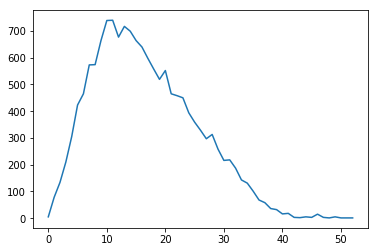

In [366]:
print(df.Slope.describe())
print(" -------- ")
print(df.Slope.value_counts())
ordenado=df.Slope.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Para Horizontal_Distance_To_Hydrology

count    15120.000000
mean       227.195701
std        210.075296
min          0.000000
25%         67.000000
50%        180.000000
75%        330.000000
max       1343.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64
 -------- 
0       1590
30      1207
150      497
60       490
42       452
67       411
85       381
108      361
90       284
120      283
95       259
134      255
124      247
212      212
277      188
242      188
162      188
190      185
175      183
180      174
201      167
127      166
210      160
192      160
228      157
268      137
234      136
170      133
240      132
300      129
        ... 
850        1
810        1
794        1
738        1
1201       1
1121       1
1073       1
1057       1
1033       1
1025       1
937        1
1090       1
1114       1
1138       1
1091       1
764        1
708        1
1203       1
1123       1
1199       1
1099       1
1075       1
1218       1
1027       1
1019       1
987        1
939        1
907 

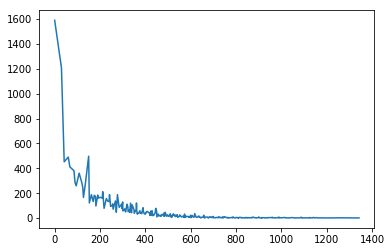

In [367]:
print(df.Horizontal_Distance_To_Hydrology.describe())
print(" -------- ")
print(df.Horizontal_Distance_To_Hydrology.value_counts())
ordenado=df.Horizontal_Distance_To_Hydrology.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Para Vertical_Distance_To_Hydrology

## Horizontal_Distance_To_Roadways

count    15120.000000
mean      1714.023214
std       1325.066358
min          0.000000
25%        764.000000
50%       1316.000000
75%       2270.000000
max       6890.000000
Name: Horizontal_Distance_To_Roadways, dtype: float64
 -------- 
150     88
120     56
390     47
618     45
1110    43
700     41
108     38
1273    37
900     37
212     37
335     37
990     37
242     36
607     36
361     35
1082    35
228     34
750     34
277     34
450     34
1050    34
1020    34
960     33
1167    33
1140    33
360     32
180     32
484     31
210     31
300     31
        ..
4440     1
2748     1
2403     1
3546     1
3538     1
2975     1
2427     1
3530     1
2435     1
2443     1
3586     1
4400     1
4751     1
3071     1
3618     1
5204     1
5164     1
4320     1
3610     1
4328     1
3103     1
3594     1
5641     1
5132     1
2307     1
4360     1
5124     1
2323     1
4384     1
2827     1
Name: Horizontal_Distance_To_Roadways, Length: 3250, dtype: int64
 -------- 


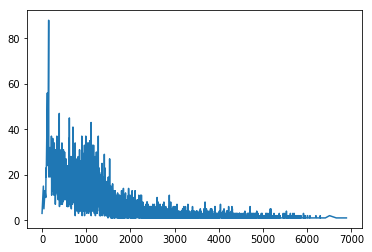

In [368]:
print(df.Horizontal_Distance_To_Roadways.describe())
print(" -------- ")
print(df.Horizontal_Distance_To_Roadways.value_counts())
ordenado=df.Horizontal_Distance_To_Roadways.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Hillshade_9am

count    15120.000000
mean       212.704299
std         30.561287
min          0.000000
25%        196.000000
50%        220.000000
75%        235.000000
max        254.000000
Name: Hillshade_9am, dtype: float64
 -------- 
226    279
229    269
224    265
228    261
230    260
233    248
223    245
219    242
231    239
225    236
232    234
221    231
235    228
236    225
222    223
227    222
234    222
238    220
239    218
242    213
220    212
237    207
241    201
218    201
245    201
253    200
249    195
216    193
250    192
254    190
      ... 
101      5
88       4
99       4
83       3
93       3
102      3
106      3
100      2
80       2
96       2
104      2
59       2
103      2
95       2
108      2
85       2
112      1
86       1
78       1
109      1
81       1
73       1
92       1
98       1
90       1
58       1
97       1
89       1
65       1
0        1
Name: Hillshade_9am, Length: 176, dtype: int64
 -------- 


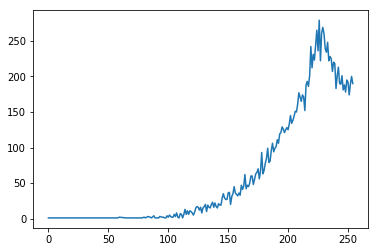

In [369]:
print(df.Hillshade_9am.describe())
print(" -------- ")
print(df.Hillshade_9am.value_counts())
ordenado=df.Hillshade_9am.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Hillshade_Noon

count    15120.000000
mean       218.965608
std         22.801966
min         99.000000
25%        207.000000
50%        223.000000
75%        235.000000
max        254.000000
Name: Hillshade_Noon, dtype: float64
 -------- 
225    327
229    324
226    320
224    313
230    311
223    303
232    298
222    297
228    294
218    293
221    292
227    289
231    284
220    272
236    270
234    269
216    266
214    263
233    261
215    255
211    251
219    247
217    247
235    232
244    228
237    224
238    214
246    214
213    210
247    210
      ... 
146      6
133      6
142      4
143      4
130      4
99       4
136      4
137      4
145      4
113      3
124      3
126      3
135      3
111      2
144      2
120      2
116      1
125      1
102      1
118      1
114      1
134      1
103      1
139      1
119      1
127      1
115      1
107      1
128      1
121      1
Name: Hillshade_Noon, Length: 141, dtype: int64
 -------- 


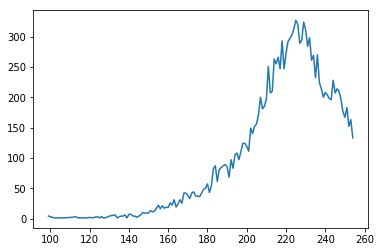

In [370]:
print(df.Hillshade_Noon.describe())
print(" -------- ")
print(df.Hillshade_Noon.value_counts())
ordenado=df.Hillshade_Noon.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Hillshade_3pm

count    15120.000000
mean       135.091997
std         45.895189
min          0.000000
25%        106.000000
50%        138.000000
75%        167.000000
max        248.000000
Name: Hillshade_3pm, dtype: float64
 -------- 
143    182
149    161
132    156
133    154
142    154
136    154
137    152
138    148
154    148
152    145
150    144
157    141
151    139
135    138
148    138
144    137
115    136
156    136
163    135
124    134
130    133
118    133
131    132
129    132
121    130
145    130
146    129
128    128
141    126
125    126
      ... 
236      8
238      8
23       8
237      8
34       8
17       7
240      7
12       7
15       6
239      5
16       5
14       5
247      4
19       4
245      4
246      4
243      4
10       3
242      3
3        3
244      3
241      3
11       2
6        2
9        2
248      2
1        1
4        1
7        1
8        1
Name: Hillshade_3pm, Length: 247, dtype: int64
 -------- 


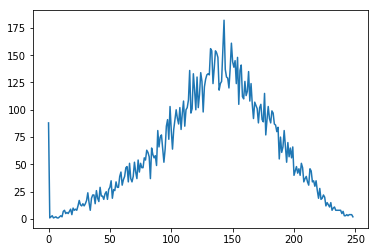

In [371]:
print(df.Hillshade_3pm.describe())
print(" -------- ")
print(df.Hillshade_3pm.value_counts())
ordenado=df.Hillshade_3pm.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Horizontal_Distance_To_Fire_Points

count    15120.000000
mean      1511.147288
std       1099.936493
min          0.000000
25%        730.000000
50%       1256.000000
75%       1988.250000
max       6993.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64
 -------- 
618     65
541     51
636     45
607     43
573     42
960     42
752     41
942     40
342     40
242     40
277     39
977     39
212     38
524     37
700     37
335     37
902     37
726     36
484     36
408     36
997     35
391     35
808     35
671     34
912     34
631     34
430     33
845     33
872     33
361     33
        ..
2428     1
2331     1
4288     1
4085     1
2052     1
6409     1
4119     1
2076     1
2283     1
4159     1
4320     1
2116     1
6214     1
6222     1
4175     1
6230     1
4471     1
4272     1
4191     1
2156     1
4264     1
4231     1
6310     1
4311     1
4335     1
6390     1
2300     1
2380     1
2139     1
6017     1
Name: Horizontal_Distance_To_Fire_Points, Length: 2710, dtype: int64
 -------- 


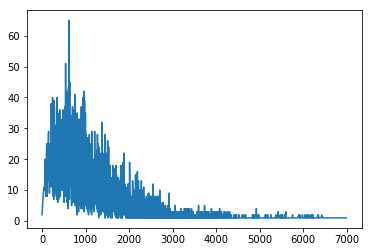

In [372]:
print(df.Horizontal_Distance_To_Fire_Points.describe())
print(" -------- ")
print(df.Horizontal_Distance_To_Fire_Points.value_counts())
ordenado=df.Horizontal_Distance_To_Fire_Points.value_counts().sort_index().plot.line()
print(" -------- ")
#df.Elevation.value_counts().plot.line()

## Wilderness_Area1

count     15120
unique        2
top           0
freq      11523
Name: Wilderness_Area1, dtype: int64
 -------- 
0    11523
1     3597
Name: Wilderness_Area1, dtype: int64
 -------- 


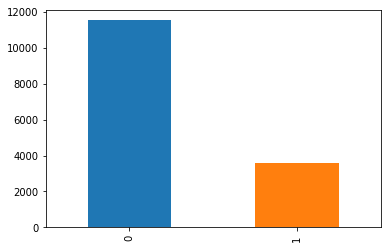

In [373]:
print(df.Wilderness_Area1.describe())
print(" -------- ")
print(df.Wilderness_Area1.value_counts())
print(" -------- ")
df.Wilderness_Area1.value_counts().plot.bar()

## Wilderness_Area2

count     15120
unique        2
top           0
freq      14621
Name: Wilderness_Area2, dtype: int64
 -------- 
0    14621
1      499
Name: Wilderness_Area2, dtype: int64
 -------- 


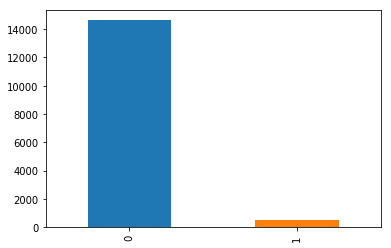

In [374]:
print(df.Wilderness_Area2.describe())
print(" -------- ")
print(df.Wilderness_Area2.value_counts())
print(" -------- ")
df.Wilderness_Area2.value_counts().plot.bar()

## Wilderness_Area3

count     15120
unique        2
top           0
freq       8771
Name: Wilderness_Area3, dtype: int64
 -------- 
0    8771
1    6349
Name: Wilderness_Area3, dtype: int64
 -------- 


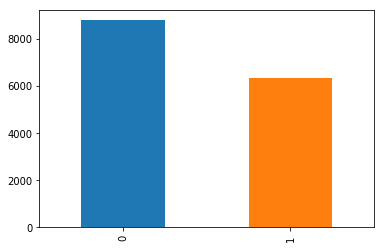

In [375]:
print(df.Wilderness_Area3.describe())
print(" -------- ")
print(df.Wilderness_Area3.value_counts())
print(" -------- ")
df.Wilderness_Area3.value_counts().plot.bar()

## Wilderness_Area4

count     15120
unique        2
top           0
freq      10445
Name: Wilderness_Area4, dtype: int64
 -------- 
0    10445
1     4675
Name: Wilderness_Area4, dtype: int64
 -------- 


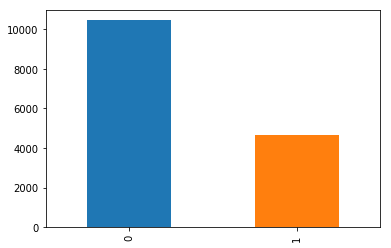

In [376]:
print(df.Wilderness_Area4.describe())
print(" -------- ")
print(df.Wilderness_Area4.value_counts())
print(" -------- ")
df.Wilderness_Area4.value_counts().plot.bar()

# Bivariado

In [377]:
var_indep_num = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                 'Horizontal_Distance_To_Roadways', 'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
                ]

In [378]:
import warnings
import math
warnings.filterwarnings('ignore')

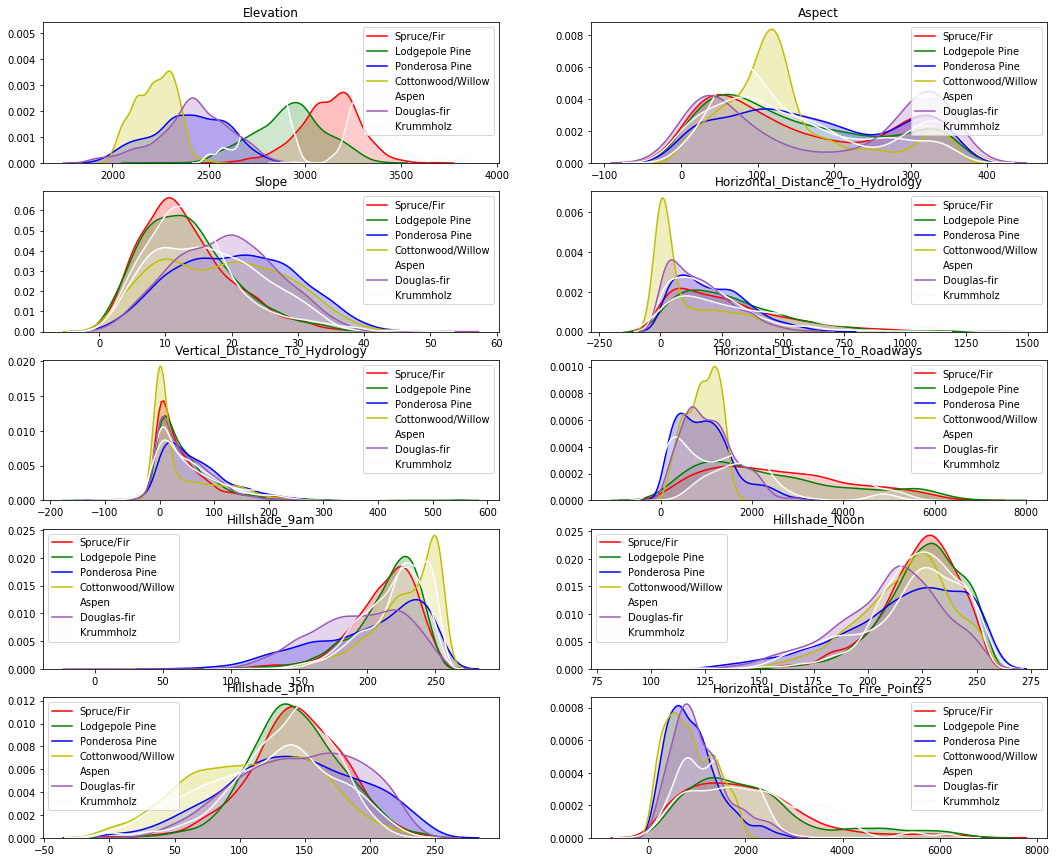

In [379]:
fig = plt.figure(figsize=(18,15))
i=1
for var_num in var_indep_num:
    ax = fig.add_subplot(math.ceil(len(var_indep_num)/2), 2, i)
    sns.kdeplot(df[df['Cover_Type']==1][var_num], shade=True, color='r', ax=ax);
    sns.kdeplot(df[df['Cover_Type']==2][var_num], shade=True, color='g', ax=ax);
    sns.kdeplot(df[df['Cover_Type']==3][var_num], shade=True, color='b', ax=ax);
    sns.kdeplot(df[df['Cover_Type']==4][var_num], shade=True, color='y', ax=ax);
    sns.kdeplot(df[df['Cover_Type']==5][var_num], shade=True, color='w', ax=ax);
    sns.kdeplot(df[df['Cover_Type']==6][var_num], shade=True, color='#9b59b6', ax=ax);
    sns.kdeplot(df[df['Cover_Type']==7][var_num], shade=True, color='7', ax=ax);
    #9v59v6
    plt.title(var_num)
    plt.legend(['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz'])

    i+=1

In [380]:
var_indep_cat = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Wilderness_Area1']

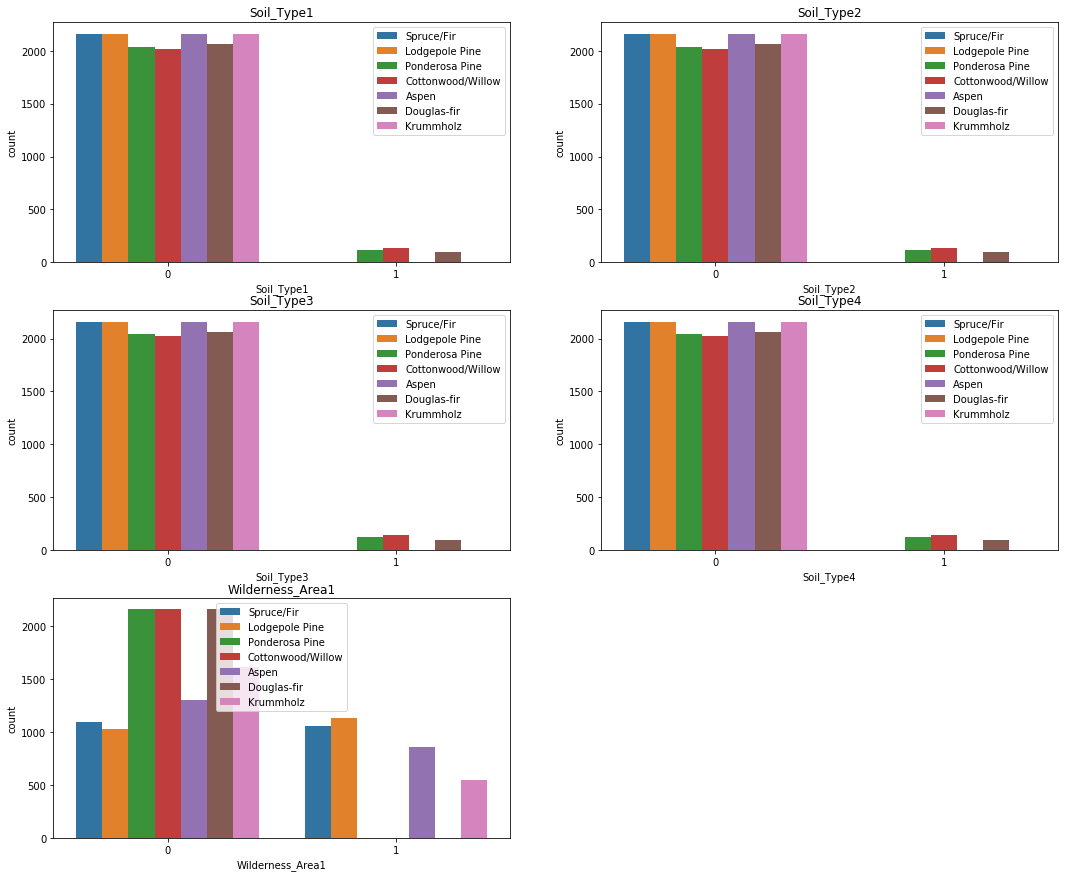

In [381]:
fig = plt.figure(figsize=(18,15))
i=1
for var_cat in var_indep_cat:
    ax = fig.add_subplot(math.ceil(len(var_indep_cat)/2), 2, i)
    sns.countplot(x=var_cat, hue="Cover_Type", data=df)
    plt.title(var_cat)
    plt.legend(['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz',])
    i+=1



# MODELO PRELIMINAR

In [382]:
dataset=pd.read_csv("./train.csv")
dataset.head()
dataset.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [383]:
cat=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4','Soil_Type1', 'Soil_Type2','Soil_Type3', 'Soil_Type10', 'Soil_Type4',
       'Soil_Type32', 'Soil_Type39', 'Wilderness_Area4', 'Wilderness_Area3',
       'Soil_Type2', 'Soil_Type38', 'Soil_Type23', 'Soil_Type11',
       'Soil_Type17', 'Soil_Type29', 'Soil_Type33', 'Soil_Type30',
       'Soil_Type20', 'Soil_Type12', 'Wilderness_Area2', 'Soil_Type24',
       'Soil_Type31', 'Soil_Type40', 'Soil_Type13', 'Soil_Type22',
       'Soil_Type6', 'Soil_Type27', 'Soil_Type35', 'Soil_Type16', 'Soil_Type5',
       'Soil_Type26', 'Soil_Type1', 'Soil_Type14', 'Soil_Type37',
       'Soil_Type36', 'Soil_Type34', 'Soil_Type19', 'Soil_Type8',
       'Soil_Type18', 'Soil_Type28', 'Soil_Type25', 'Soil_Type15',
       'Soil_Type21', 'Soil_Type7', 'Soil_Type9']
for val in cat:
    dataset[val]=dataset[val].astype(object)

In [384]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=None,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=2, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

In [385]:

X = dataset.drop("Cover_Type",axis=1)
# print(X.head())
Y = dataset['Cover_Type']
# Y=Y.astype(object)

In [386]:
np.random.seed(1234)
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(y_test.shape, X_test.shape)
ctree.fit(X_train, y_train)

(4536,) (4536, 55)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [387]:
X.columns[np.argsort(-ctree.feature_importances_)]

Index(['Elevation', 'Horizontal_Distance_To_Roadways', 'Id',
       'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology', 'Hillshade_Noon',
       'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Aspect',
       'Soil_Type10', 'Hillshade_3pm', 'Wilderness_Area1', 'Slope',
       'Soil_Type3', 'Soil_Type4', 'Wilderness_Area3', 'Soil_Type39',
       'Soil_Type29', 'Soil_Type32', 'Soil_Type38', 'Soil_Type11',
       'Soil_Type6', 'Wilderness_Area4', 'Soil_Type20', 'Soil_Type2',
       'Soil_Type12', 'Soil_Type30', 'Soil_Type23', 'Soil_Type35',
       'Soil_Type17', 'Soil_Type14', 'Soil_Type40', 'Soil_Type31',
       'Wilderness_Area2', 'Soil_Type33', 'Soil_Type27', 'Soil_Type19',
       'Soil_Type24', 'Soil_Type1', 'Soil_Type13', 'Soil_Type22',
       'Soil_Type21', 'Soil_Type26', 'Soil_Type16', 'Soil_Type34',
       'Soil_Type5', 'Soil_Type37', 'Soil_Type36', 'Soil_Type18',
       'Soil_Type28', 'Soil_Type25', 'Soil_Type9', 'Soil_Type15', 'Soil_Type7',
     

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
y_predict=ctree.predict(X_test)
print(y_predict.shape, y_test.shape, X_test.shape)


cm=metrics.confusion_matrix(y_predict,y_test)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(7)
plt.xticks(tick_marks, [1,2,3,4,5,6,7])
plt.yticks(tick_marks, [1,2,3,4,5,6,7])
print("Kappa: ",metrics.cohen_kappa_score(y_test,y_predict))

In [ ]:
target= y_test
predicted=y_predict
print("Exactitud: ", metrics.accuracy_score(target,predicted))
print("Error: ",1-metrics.accuracy_score(target,predicted))
print("Kappa    : ", metrics.cohen_kappa_score(target,predicted))
print("-------------------------------------")
i=1
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")
i=2
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")
i=3
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")
i=4
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")
i=5
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")
i=6
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")
i=7
print("Precisión     : ", metrics.precision_score(target,predicted, labels=[i], average="macro"))
print("Recall        : ", metrics.recall_score(target,predicted, labels=[i], average="macro"))
print("F1-score      : ", metrics.f1_score(target,predicted, labels=[i], average="macro"))
print("-------------------------------------")